In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
data=pd.read_csv("Bowlers.csv")

In [12]:
data

,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,4,3,1,55,4,1,13.75
1,3,0,0,36,0,0,12.00
2,3,0,0,41,0,0,13.67
3,1,0,0,10,0,1,10.00
4,1,0,0,11,0,0,11.00
...,...,...,...,...,...,...,...
7580,3,2,0,41,2,1,13.67
7581,4,1,0,35,1,2,8.75
7582,2,0,0,17,0,1,8.50
7583,3,0,0,40,0,0,13.33


In [13]:
data.isnull().sum()

over           0
wide_runs      0
noball_runs    0
runs           0
extras         0
wickets        0
Econ           0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lb=LabelEncoder()
   

In [87]:
x=data.iloc[:,:2].values
y=data['runs']

In [88]:
x


array([[3, 3],
       [2, 0],
       [2, 0],
       ...,
       [1, 0],
       [2, 0],
       [3, 0]], dtype=int64)

In [89]:
y

0       55
1       36
2       41
3       10
4       11
        ..
7580    41
7581    35
7582    17
7583    40
7584    37
Name: runs, Length: 7585, dtype: int64

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [91]:
x_train

array([[3, 4],
       [3, 0],
       [3, 0],
       ...,
       [3, 0],
       [1, 1],
       [1, 0]], dtype=int64)

In [92]:
model=LinearRegression()

In [93]:
model.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred=model.predict(x_test)


In [95]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

65.15392881463352


In [96]:
over_prediction=[[3,4]]
predicted_runs= model.predict(over_prediction)
print(f'predicted runs for over {over_prediction[0][0]}:',predicted_runs[0])

predicted runs for over 3: 33.16397907833145


In [107]:
x_test_select=x_test[:,0]
x_test_select

array([3, 3, 3, ..., 3, 1, 3], dtype=int64)

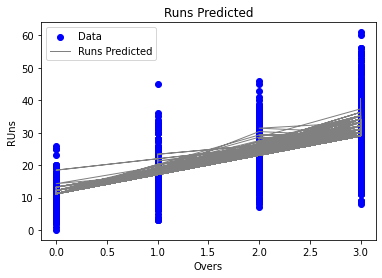

In [109]:
plt.scatter(x_test_select,y_test,color='blue',label='Data')
plt.plot(x_test_select,y_pred,color='gray',linewidth=1,label='Runs Predicted')
plt.xlabel('Overs')
plt.ylabel('RUns')
plt.title('Runs Predicted')
plt.legend()
plt.show()
